<a href="https://colab.research.google.com/github/MuhammadFadhilArkan/Techtest/blob/main/Q3/Multinomial-Naive-Bayes/Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the library

In [1]:
import pandas as pd
from IPython.display import display, HTML
import os
from re import search
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

Define the path of the text file

In [2]:
path= "/content/drive/MyDrive/CAD IT/Machine Learning Application Engineer Test 2021 V1.1/Q3/"

Read the text file

In [3]:
arr = os.listdir(path)
strtxt = ".txt"
datas = []
for txtfile in arr:
    if txtfile.__contains__(strtxt):
        fileObject = open(path+txtfile, "r")
        data = fileObject.read()
        datas.append(data)

Extract only needed sentence from the files by cleaning sentence that start with "#"

In [4]:
ds = []
for data in datas :
  text = datas[0].split("\n")
  for item in text:
    if ((len(item)>0) and (item[0] != "#")):
      ds.append(item)

Separate each sentence into label and sentence

In [5]:
labels = []
sentences = []
for item in ds :
  label = item[:4]
  sentence = item[4:]

  labels.append(label)
  sentences.append(sentence)

Make a pandas dataframe from the labels and sentences for sake of visualization

In [6]:
data_dict = {"label": labels, "sentence": sentences}
df = pd.DataFrame(data_dict)
df

,label,sentence
0,AIMX,We propose a nonparametric Bayesian factor re...
1,BASE,"To accomplish this, we propose a sparse varia..."
2,OWNX,We apply this model to two problems (factor a...
3,MISC,Factor analysis is the task of explaining dat...
4,MISC,Factor regression couples this analysis wit...
...,...,...
2065,OWNX,Since our motivation is an application in bio...
2066,OWNX,"In particular, genes are features , sampl..."
2067,OWNX,"However, our model is more general"
2068,OWNX,An alternative application might be to a coll...


As we can see the data is already cleaned, but lets check the distribution of labels

In [7]:
print(f"Value counts for each class:\n\n{df.label.value_counts()}\n")

Value counts for each class:

OWNX    1350
MISC     450
BASE      90
AIMX      90
CONT      90
Name: label, dtype: int64



We can see that this is an unbalanced dataset, so we have to do the train_test split correctly by using "stratify" option from scikit library

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.sentence, df.label, test_size=0.2, random_state=42, stratify=labels)

Check the distribution of labels on each train and test set

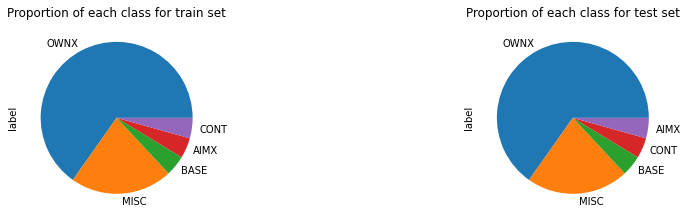

In [9]:
plt.subplot(1, 3, 1)
y_train.value_counts().plot.pie(y='label', title='Proportion of each class for train set', figsize=(10, 6))

plt.subplot(1, 3, 3)
y_test.value_counts().plot.pie(y='label', title='Proportion of each class for test set', figsize=(10, 6))

plt.tight_layout()
plt.show()

Yes! the train and test set is balanced

Next, encode the text data

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

# Allow unigrams and bigrams
vectorizer = CountVectorizer(ngram_range=(1, 5))

Build classifier using Multinomial Naive Bayes 

In [21]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB


def calculate_accuracy(X_tr, y_tr, X_te=X_test, y_te=y_test, 
                       clf=MultinomialNB(), vectorizer=vectorizer):
    
    # Encode train text
    X_train_vect = vectorizer.fit_transform(X_tr)
    
    # Fit model
    clf.fit(X=X_train_vect, y=y_tr)
    
    # Vectorize test text
    X_test_vect = vectorizer.transform(X_te)
    
    # Make predictions for the test set
    preds = clf.predict(X_test_vect)
    
    # Return accuracy score
    return f1_score(preds, y_te,average='weighted')

In [24]:
# Empty dictionary
scores = dict()

Calculate accuracy

In [25]:
score = calculate_accuracy(X_train, y_train)

# Save the result
scores['eval'] = score

print(f"The train dataset achieved an f1_score of {accs['eval']*100:.2f}%")

The train dataset achieved an f1_score of 100.00%


WOW! Surprisingly, we also achieved 100% f1 score by using Multinomial Naive Bayes !